# Randon Forest Model wwith TF-IDF and Bag of words

In [1]:
# file path exist
import os.path
from os import path

# translator
import googletrans
from googletrans import Translator

# pandas
import pandas as pd

# preprocessing of text
import re
import string


# word tokenizer by nltk
from nltk import word_tokenize

# lemmatizer
from nltk.stem import WordNetLemmatizer

# stopwords (Remove buzz words)
from nltk.corpus import stopwords

# split data into train and test
from sklearn.model_selection import train_test_split

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# RFM classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

# Tf-idf feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# cross validation for kfold
from sklearn.model_selection import cross_val_score

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:
# For non English data

df = pd.read_csv('Eng-Hin-data/hindi-anot-shuffled.csv',  
               delimiter=',')
df.columns = ['Text', 'Label']
df.head(15)
df["Text"] = df["Text"].astype(str)
df["Label"] = df["Label"].astype(str)
data = df

### Class count

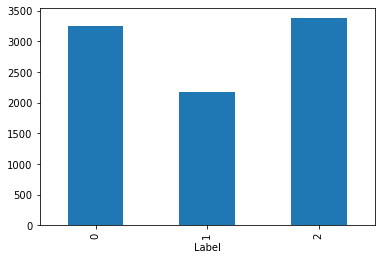

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [4]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

2    3375
0    3244
1    2174
Name: Label, dtype: int64

### Data Preprocessing

In [5]:
# People usually join sentences using more than one colon 

def ReplaceDoubleColon(inputString):
    return inputString.replace("..", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceDoubleColon(x))

def ReplaceTripleColon(inputString):
    return inputString.replace("...", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceTripleColon(x))

def ReplaceFourColon(inputString):
    return inputString.replace("....", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceFourColon(x))

In [6]:
#Removing punctuations
data['Text'] = data['Text'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [7]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"@", " ", text)
    text = re.sub(r" \n ", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [8]:
data.shape

(8793, 2)

In [9]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [10]:
# Lower Case
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [11]:
# Remove Link

def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in lower_tokens]

In [12]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [13]:
# Removing Stopwords
stoplist=open("Devanagari/stopwords.txt","r")

In [14]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [15]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [16]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.head(9)

,Text_Final,tokens,Label,0,1,2,Category_id
0,गाजा में दीवाली की ढेरो बधाई मित्रो 😊💐 israeli...,"[गाजा, में, दीवाली, की, ढेरो, बधाई, मित्रो, 😊💐...",2,0,0,1,2
1,sanjaygadhiainc indiatoday18 अज़ाबे इलाही 👍,"[sanjaygadhiainc, indiatoday18, अज़ाबे, इलाही, 👍]",1,0,1,0,1
2,आखिर अब सुशांतसिंहराजपूत जी को न्याय मिल जायेग...,"[आखिर, अब, सुशांतसिंहराजपूत, जी, को, न्याय, मि...",0,1,0,0,0
3,अमीन के 500 से अधिक छात्रों ने सर्वे भवन के गे...,"[अमीन, के, 500, से, अधिक, छात्रों, ने, सर्वे, ...",0,1,0,0,0
4,deoriapolice uppolice myogiadityanath spgrpall...,"[deoriapolice, uppolice, myogiadityanath, spgr...",0,1,0,0,0
5,khanumarfa जेहादी सोच जब राहतइंदौरी को भी लपेट...,"[khanumarfa, जेहादी, सोच, जब, राहतइंदौरी, को, ...",2,0,0,1,2
6,आज के दिन ही मेरा क्रिकेट प्रेम भी समाप्त हो गया,"[आज, के, दिन, ही, मेरा, क्रिकेट, प्रेम, भी, सम...",0,1,0,0,0
7,जेहादी सोच थी उसकी कोई शायर का काम थोड़ी था मन...,"[जेहादी, सोच, थी, उसकी, कोई, शायर, का, काम, थो...",2,0,0,1,2
8,sanatan44005733 azadsamajparty0 manikar3002388...,"[sanatan44005733, azadsamajparty0, manikar3002...",2,0,0,1,2


In [17]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 10 % for testing. We use random state so every time we get the same training and testing data.

# RFM - TFIDF

In [18]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 5), stop_words='english')
features = vectorizer.fit_transform(data.Text_Final).toarray()
labels = data.Label
features.shape

(8793, 16877)

In [19]:
# Spliting data
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features, labels, data.index, test_size=0.20, random_state=42)

In [20]:
# Generate model
model1 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
clf1 = model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

### RFM - Showing some prediction

In [45]:
# 2
print(clf1.predict(vectorizer.transform(["'गाजा में दीवाली   की ढेरो बधाई मित्रो 😊💐  #IsraeliBombing 😂😂"])))

['0']


In [46]:
# 2
print(clf1.predict(vectorizer.transform(["UK ने भारत को लुटा था अब जिहादी UK को लुटने पोहँच गए। जो करोगे सो भरोगे।"])))

['2']


In [47]:
# 0
print(clf1.predict(vectorizer.transform([" समाज वादी  पार्टी  जिंदाबाद "])))

['0']


In [48]:
# 1
print(clf1.predict(vectorizer.transform(["इसलाम सुंदर है" ])))

['0']


In [21]:
# 0
print(clf1.predict(vectorizer.transform(["Modi ho ya Manmohan singh saala yeh log kuch ny karta hai sirf vote ka lia 56 ka seena dikahata hai"])))

['2']


In [22]:
# 1
print(clf1.predict(vectorizer.transform(["Islam is beautiful"])))

['0']


In [23]:
# 2
print(clf1.predict(vectorizer.transform(["Muslim are the worst people"])))

['0']


In [24]:
# 0
print(clf1.predict(vectorizer.transform(["These media fellows have time to dissect one's social media profile,but none of spineless jokers has the guts to question as to why and how a convict like Lalu Yadav is roaming outside and running a Government."])))

['0']


### RFM - Displaying false-positive rate (FPR) and true positive rate (TPR)

Random Forest Method


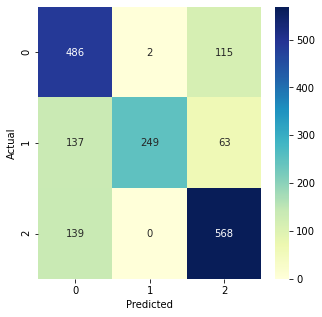

In [25]:
# confusion matrix
print("Random Forest Method")
conf_mat = confusion_matrix(y_test, y_pred1)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### RFM - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix.

In [26]:
results1 = confusion_matrix(y_test, y_pred1)
print ('Confusion Matrix :')
print(results1) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred1))
print ('Report : ')
print (classification_report(y_test, y_pred1))

Confusion Matrix :
[[486   2 115]
 [137 249  63]
 [139   0 568]]
Accuracy Score : 0.7407617964752701
Report : 
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       603
           1       0.99      0.55      0.71       449
           2       0.76      0.80      0.78       707

    accuracy                           0.74      1759
   macro avg       0.80      0.72      0.74      1759
weighted avg       0.78      0.74      0.74      1759



### RFM K-fold

In [27]:
import random
# Creating model
model1 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model1, features, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Random Forest with BOW: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )



Random Forest with BOW: 
1 0.696590909090909
2 0.75
3 0.7352272727272727
4 0.714448236632537
5 0.7178612059158134
6 0.6985210466439136
7 0.7758816837315131
8 0.7349260523321957
9 0.7258248009101251
10 0.7406143344709898
 Average Accuracy : 0.7289895542455269


# RFM - BOW

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
features3 = count_vect.fit_transform(data.Text_Final).toarray()
labels = data.Label
features3.shape

(8793, 8888)

In [29]:
# Using similar split as CNN model
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features3, labels, data.index, test_size=0.10, random_state=42)

In [30]:
# generate Linear SVM model
model3 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=52)
clf3 = model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

### RFM - BOW - Showing some prediction

In [40]:
# 2
print(clf3.predict(count_vect.transform(["'गाजा में दीवाली   की ढेरो बधाई मित्रो 😊💐  #IsraeliBombing 😂😂"])))

['0']


In [41]:
# 2
print(clf3.predict(count_vect.transform(["UK ने भारत को लुटा था अब जिहादी UK को लुटने पोहँच गए। जो करोगे सो भरोगे।"])))

['2']


In [42]:
# 0
print(clf3.predict(count_vect.transform([" समाज वादी  पार्टी  जिंदाबाद "])))

['0']


In [43]:
# 1
print(clf3.predict(count_vect.transform(["इसलाम सुंदर है" ])))

['0']


In [44]:
# 0
print(clf3.predict(count_vect.transform(["These media fellows have time to dissect one's social media profile,but none of spineless jokers has the guts to question as to why and how a convict like Lalu Yadav is roaming outside and running a Government."])))

['2']


In [34]:
# 2
print(clf3.predict(count_vect.transform(["Muslim asshole !"])))

['0']


In [35]:
# 1
print(clf3.predict(count_vect.transform(["Islam is a awesome, I have a muslim friend"])))

['0']


In [36]:
print(clf3.predict(count_vect.transform(["Blacks are asshole"])))

['0']


###  RFM - BOW - Displaying false-positive rate (FPR) and true positive rate (TPR)

                     RFM - BOW


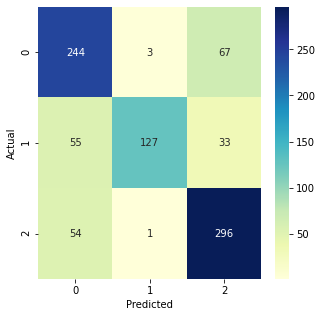

In [37]:
from sklearn.metrics import confusion_matrix
print("                     RFM - BOW")
conf_mat = confusion_matrix(y_test, y_pred3)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### RFM - BOW - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix.

In [38]:
results3 = confusion_matrix(y_test, y_pred3)
print ('Confusion Matrix :')
print(results3) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred3))
print ('Report : ')
print (classification_report(y_test, y_pred3))

Confusion Matrix :
[[244   3  67]
 [ 55 127  33]
 [ 54   1 296]]
Accuracy Score : 0.7579545454545454
Report : 
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       314
           1       0.97      0.59      0.73       215
           2       0.75      0.84      0.79       351

    accuracy                           0.76       880
   macro avg       0.80      0.74      0.75       880
weighted avg       0.78      0.76      0.76       880



### RFM with BOW Kfold

In [39]:
# model
model3 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=32)

# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model3, features3, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Random Forest with BOW: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )

Random Forest with BOW: 
1 0.7715909090909091
2 0.8079545454545455
3 0.7954545454545454
4 0.8031854379977247
5 0.7906712172923777
6 0.782707622298066
7 0.7781569965870307
8 0.7997724687144482
9 0.7849829351535836
10 0.8134243458475541
 Average Accuracy : 0.7927901023890784
